In [0]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images,mnist_test_labels) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images=mnist_train_images.reshape(60000, 784)
test_images=mnist_test_images.reshape(10000, 784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
train_labels=keras.utils.to_categorical(mnist_train_labels, 10)
test_labels=keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


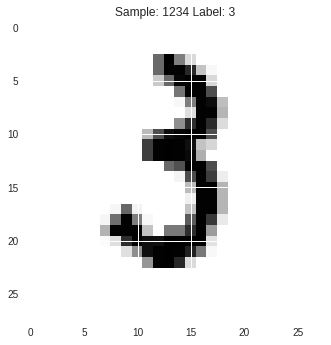

In [7]:
import matplotlib.pyplot as plt

def display_samp(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train_images[num].reshape([28,28])
  plt.title('Sample: %d Label: %d' %(num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()
  
display_samp(1234)

In [8]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [13]:
history=model.fit(train_images, train_labels,batch_size=100,epochs=10,verbose=2,
                 validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 6s - loss: 0.2410 - acc: 0.9304 - val_loss: 0.1187 - val_acc: 0.9641
Epoch 2/10
 - 6s - loss: 0.0974 - acc: 0.9706 - val_loss: 0.0822 - val_acc: 0.9750
Epoch 3/10
 - 6s - loss: 0.0647 - acc: 0.9805 - val_loss: 0.0732 - val_acc: 0.9771
Epoch 4/10
 - 6s - loss: 0.0474 - acc: 0.9863 - val_loss: 0.0720 - val_acc: 0.9786
Epoch 5/10
 - 6s - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0699 - val_acc: 0.9798
Epoch 6/10
 - 6s - loss: 0.0272 - acc: 0.9919 - val_loss: 0.0629 - val_acc: 0.9811
Epoch 7/10
 - 6s - loss: 0.0209 - acc: 0.9938 - val_loss: 0.0656 - val_acc: 0.9830
Epoch 8/10
 - 6s - loss: 0.0164 - acc: 0.9951 - val_loss: 0.0706 - val_acc: 0.9809
Epoch 9/10
 - 6s - loss: 0.0121 - acc: 0.9963 - val_loss: 0.0700 - val_acc: 0.9819
Epoch 10/10
 - 6s - loss: 0.0098 - acc: 0.9971 - val_loss: 0.0685 - val_acc: 0.9840


In [14]:
score=model.evaluate(test_images,test_labels, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.06853544025517985
Test accuracy: 0.984


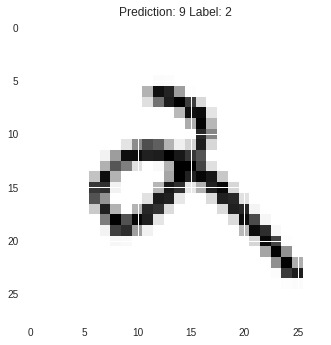

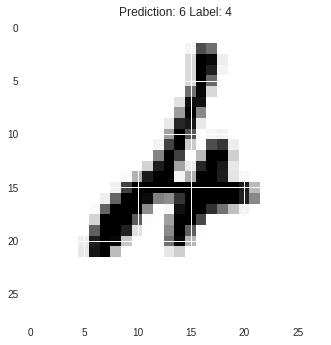

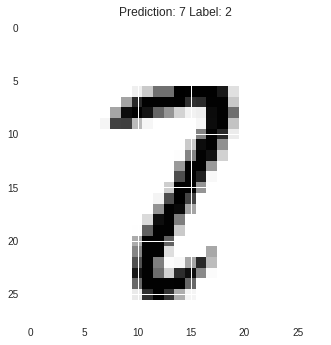

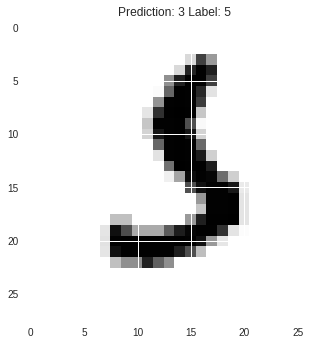

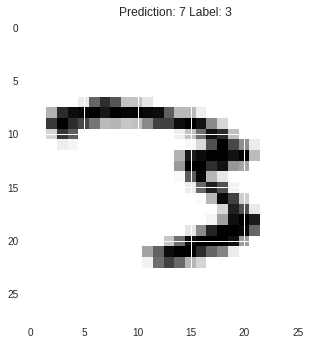

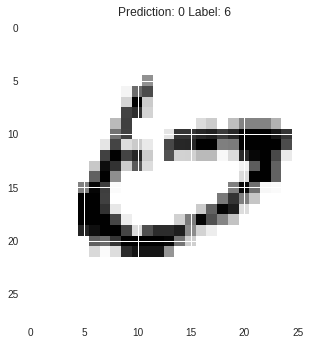

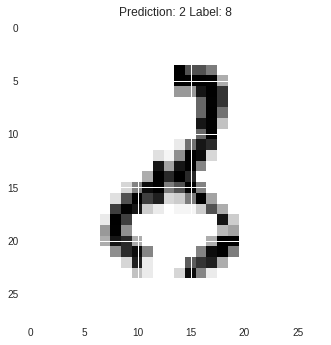

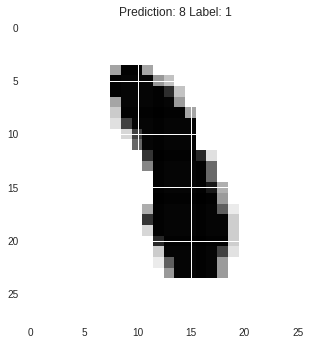

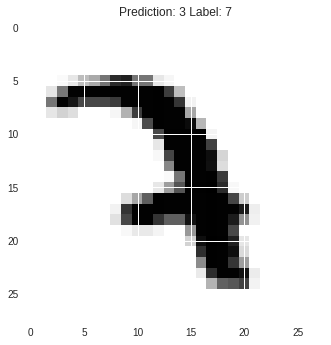

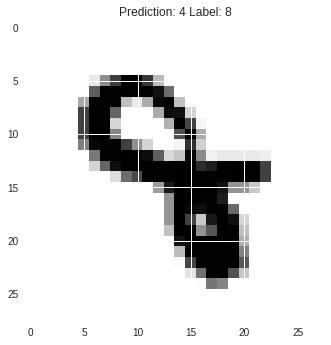

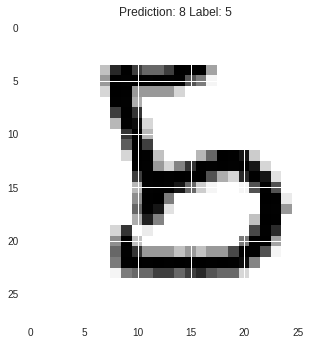

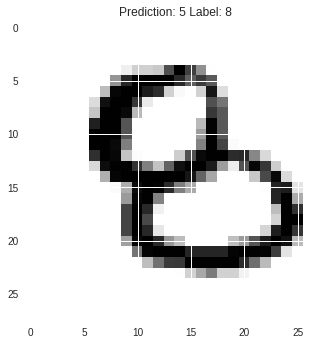

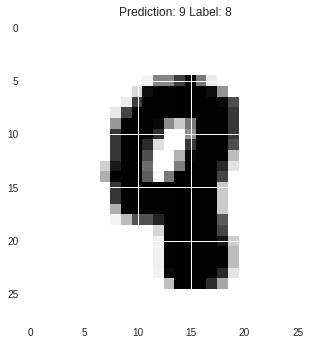

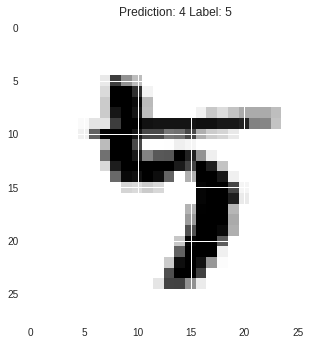

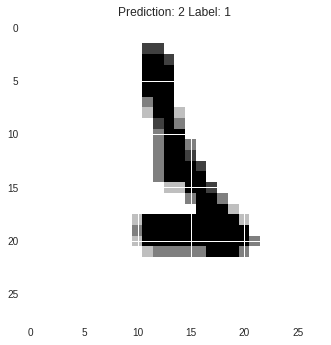

In [15]:
for x in range(1000):
  test_image=test_images[x,:].reshape(1,784)
  predicted_cat=model.predict(test_image).argmax()
  label=test_labels[x].argmax()
  if(predicted_cat != label):
    plt.title('Prediction: %d Label: %d' % (predicted_cat,label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()